<a href="https://colab.research.google.com/github/ShahrukhS/CE888-Data-Science/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/ShahrukhS/CE888-Data-Science/main/Lab_3/dataset/bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Pre-processing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [35]:
df.drop('duration', axis=1, inplace=True)
le = LabelEncoder()
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df[["y"]] = df[["y"]].apply(le.fit_transform)
df = pd.get_dummies(df)

In [36]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [37]:
df.isnull().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

In [38]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

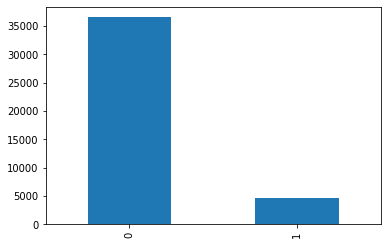

In [39]:
df['y'].value_counts().plot.bar(ylim=0)

In [40]:
X = df.drop('y', axis=1).copy()
y = df['y'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)

In [41]:
features = X_train.columns.values

In [42]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [43]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=make_scorer(f1_score))
scores.mean()

0.2441536101125919

In [44]:
dummy = DummyClassifier(strategy='stratified')
scores = cross_val_score(dummy, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
scores.mean()

0.10948725396174659

In [45]:
def featureimportance(clf, top_features=None):
  importances = clf.feature_importances_
  std = np.std([tree.feature_importances_ for tree in clf.estimators_],
              axis=0)
  indices = np.argsort(importances)[::-1]
  print(indices)

  # Print the feature ranking
  print("Feature ranking:")

  tf_range = X.shape[1]
  if top_features is not None:
    tf_range = top_features

  for f in range(tf_range):
      print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

  # Plot the feature importances of the forest
  fig = plt.figure()
  plt.title("Feature importances")
  plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
  plt.xticks(range(X.shape[1]), np.array(features)[indices])
  plt.xlim([-1, X.shape[1]])
  plt.ylim([0, None])

  fig.set_size_inches(15, 8)

In [47]:
param_grid = { 
    'n_estimators': [100, 800], 
    'max_features': ['auto'],
    'max_depth' : [3,5,10],
    'criterion' : ['gini', 'entropy']
}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print('Best Params : ', grid.best_params_)
print('Best Score : ', grid.best_score_)

Best Params :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 800}
Best Score :  0.9008801213960546


In [55]:
clf = grid.best_estimator_

In [58]:
score_cv = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1_macro')
score_cv.mean()

0.6404375097186844

In [50]:
def genenralizationerror(classifier):
    y_bias = (np.nanmean(y_test) - np.nanmean(classifier.predict(X_test), axis=0)) **2
    y_error = np.nanmean((y_test - classifier.predict(X_test)) **2, axis=0)#.mean()
    y_var = np.nanvar(classifier.predict(X_test), axis=0, ddof = 1)
    print(np.nanmean(y_bias) +  np.nanmean(y_var))
    clf_type = "Decision tree"
    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
              "+ {3:.4f} (var)".format(clf_type, np.nanmean(y_error), np.nanmean(y_bias), np.nanmean(y_var)))
    print("{0}: {1:.4f} ((bias^2) + (var)) = {2:.4f} (bias^2) "
              "+ {3:.4f} (var)".format(clf_type, np.mean(y_bias) + np.mean(y_var), np.mean(y_bias), np.mean(y_var)))

[ 7  8  2 61  4  6  5  0  3  1 52 60 59 49 43 42 50 55 44 31 48 56 57 54
 36 38 10 53 23 22 58 33 28 14 34  9 18 39 17 41 30 27 21 25 32 45 16 47
 13 26 51 15 19 37 12 40 20 46 11 24 29 35]
Feature ranking:
1. euribor3m (0.151446)
2. nr.employed (0.136580)
3. pdays (0.087804)


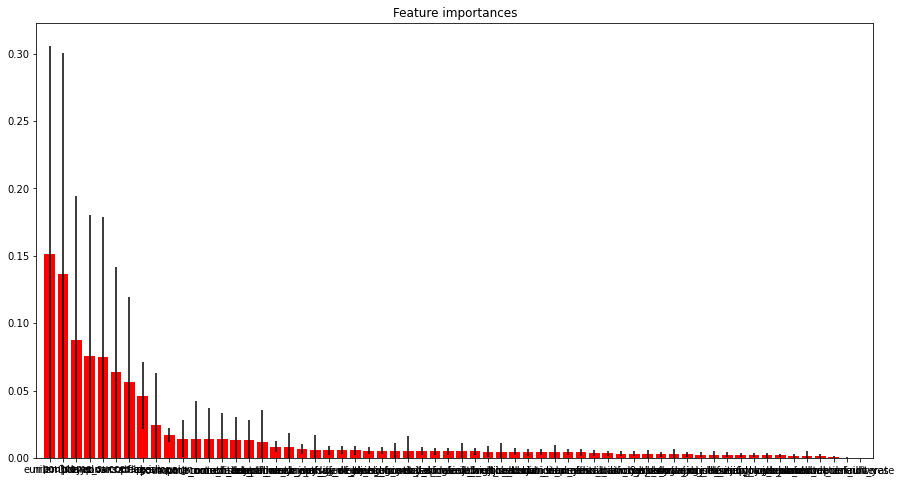

In [51]:
featureimportance(clf, 3)

In [52]:
genenralizationerror(clf)

0.04353953405774001
Decision tree: 0.0988 (error) = 0.0053 (bias^2) + 0.0382 (var)
Decision tree: 0.0435 ((bias^2) + (var)) = 0.0053 (bias^2) + 0.0382 (var)


### Lab Quiz

In [54]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=60)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
f1_score(y_test, preds, average='macro')

0.6524606058686876

In [ ]:
featureimportance(clf, 3)